In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
white_wine = pd.read_csv('./winequality-white.csv', sep=';')
# tham so sep dung de bo di dau ;

In [4]:
red_wine = pd.read_csv('./winequality-red.csv', sep=';')

In [5]:
# add a new column wine_type
white_wine['wine_type'] = 'white'
red_wine['wine_type'] = 'red'


In [6]:
# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                     if value <= 5 else 'medium'
                                                     if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low','medium','high'])

In [7]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [8]:
# lambda is a small anonym function
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                     if value <= 5 else 'medium'
                                                     if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low','medium','high'])

In [9]:
# merge red and white wine 
wines = pd.concat([red_wine, white_wine])

In [10]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [11]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,medium


In [12]:
# random data point
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

## reset)index la de sap xep lai chi so index (neu ko co no thi data point van sap xep ngau nhien nhung index
## van ko theo dung thu tu tu` 1 --> tail() )
## drop: Do not try to insert index into dataframe columns. This resets the index to the default integer index.


In [13]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [35]:
# Desciptive Statistics

In [37]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(), 2) # round la ham lam tron so 
ws = round(white_wine[subset_attributes].describe(),2) # lam tron den 2 chu so thap phan
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])


Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [38]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

In [14]:
# UNIVARIATE ANALYSIS

In [15]:
# One of the most effective ways to visualize all numeric data and the distributes, is to leverage 
## histograms using pandas

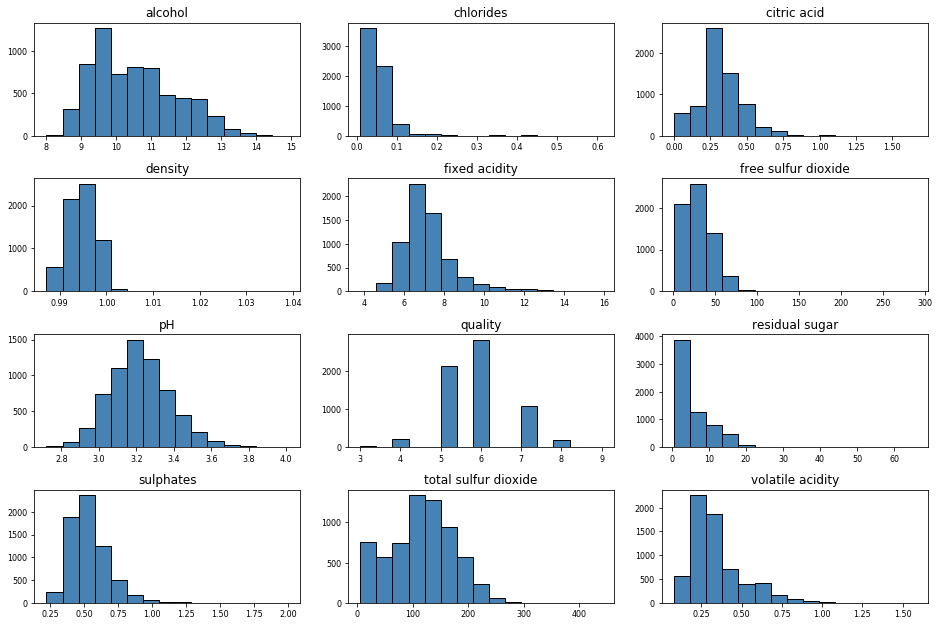

In [28]:
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2.2, 2.2))

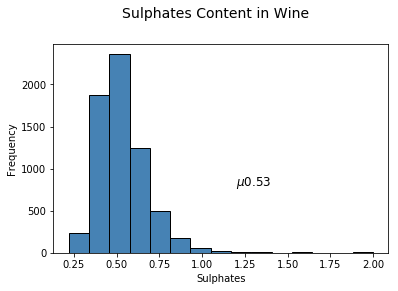

In [32]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$'+str(round(wines['sulphates'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15, edgecolor='black', linewidth=1)



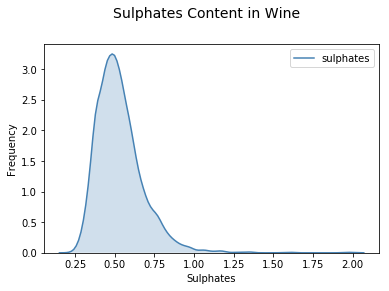

In [34]:
# Density Plot
fig = plt.figure(figsize=(6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel('Sulphates')
ax1.set_ylabel('Frequency')
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

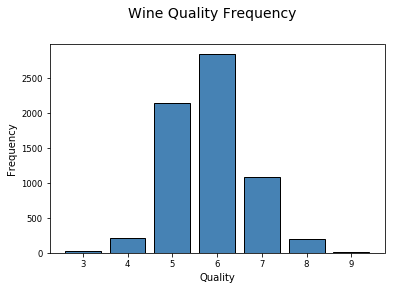

In [51]:
# Bar plot is one of the most effective ways to visulize a discrete, categorical data attribute
# Also, you can use pie-charts but in general try avoiding them altogether, especially when 
# the number of distinct categories is more than three

# bar plot

fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency")
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', edgecolor="black", linewidth=1)

In [52]:
# Multivariate Analysis


In [53]:
# Visualizing data in Two Dimension (2-D)

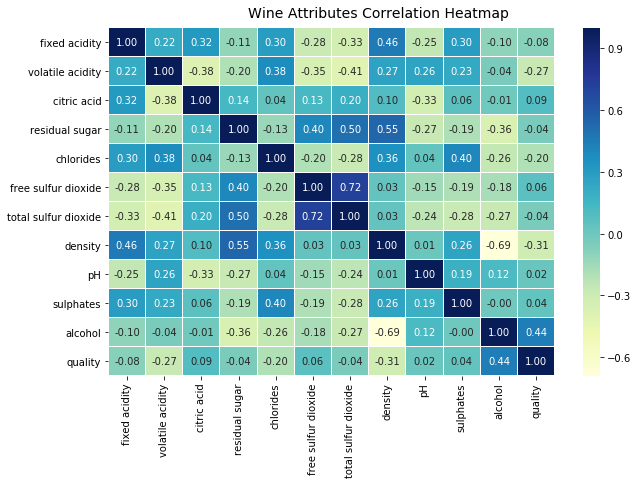

In [66]:
# One of the best ways to check out potential relationships or correlations
# amongs the diffenct data attributes is to leverage a pair-wise correlation
# matrix and depict it as a heatmap

# Correlation Matrix Heatmap

f, ax = plt.subplots(figsize=(10,6))
corr = wines.corr()

# heatmap
hm = sns.heatmap(round(corr, 2), annot=True , ax=ax, cmap='YlGnBu', fmt='.2f', linewidth=.05)
f.subplots_adjust(top=0.93)
# cmap: doi mau cua heatmap
# annot: hien thi gia tri vao moi o
# fmt: kieu dinh dang gia tri dien vao cac o
t = f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

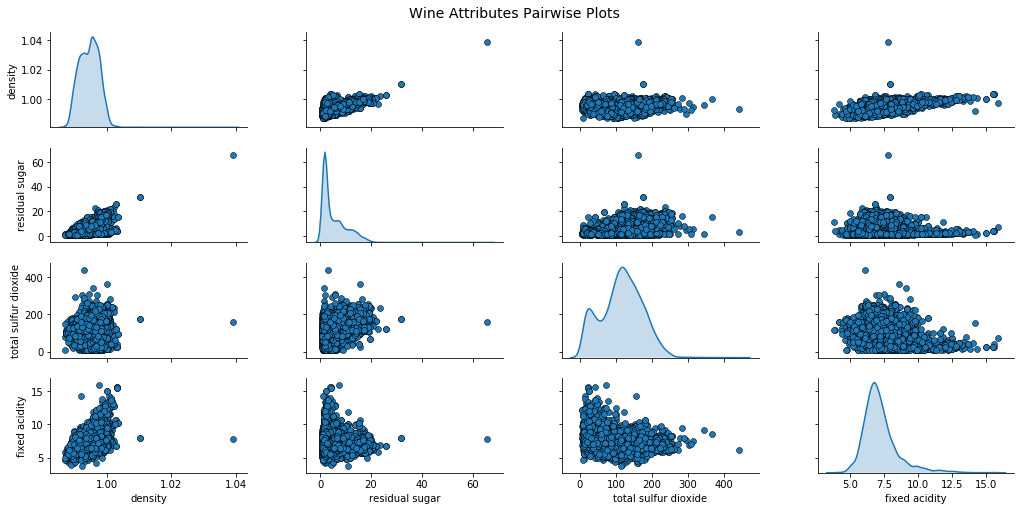

In [79]:
# We can clearly see the strength of the correlation by using pair-wise 
# scatter plots amongs attributes of interest

# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], height=1.8, aspect=2,plot_kws=dict(edgecolor='k', linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))
# aspect: scalar: aspect * height = widget of each facet
#plot_kws: thong so cho tung bieu do
# diag_kind: cac dang plot cho tung subplots
# diag_kws = dict(shade=True): Set thanh False se hieu thong so nay`
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

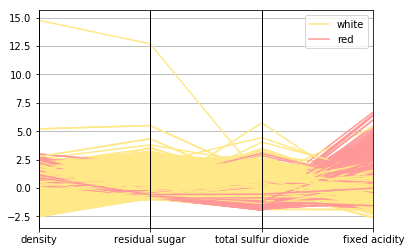

In [91]:
# Another way of visualizing multivariate data is to use parrallel coordinates

# Scalling attribute values to avoid few outliers

cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))

In [88]:
import sklearn